In [645]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore
from sklearn import linear_model

In [646]:
file_train = 'Doctor_Final_Train.xlsx'
file_x_test = 'Doctor_Final_Test.xlsx'
#file_y_test = 'Doctor_Sample_submission.xlsx'

In [647]:
def read_data(file_name):
    # Reading file
    print ('Filename : ', file_name)
    ds = pd.read_excel(file_name)
    return (ds)

In [648]:
# remove skewness of data
def remove_skew(x):
    for col in x.columns:
        if x.skew().loc[col] > 0.55:
            x[col] = np.sqrt(x[col]) 
    return (x)

In [649]:
# Subroutine for boxplot
def plot_box(column):
    sns.boxplot(column)
    plt.show()
    return

In [650]:
# Swarmplot
def plot_swarm(col1, col2, ds):
    sns.swarmplot(x=col1, y=col2, data=ds)
    plt.show()
    return

In [651]:
# Distributionplot
def plot_dist(column):
    sns.distplot(column)
    plt.show()
    return

In [652]:
# Histogram
def plot_hist(column):
    plt.hist(column)
    plt.show()
    return

In [653]:
# Violinplot
def plot_violin(column):
    sns.violinplot(column)
    plt.show()
    return

In [654]:
# categoryplot
def plot_cat(col1, ds):
    sns.catplot(x=col1, data=ds)
    plt.show()
    return

In [655]:
# Boxenplot
def plot_boxen(column):
    sns.boxenplot(column)
    plt.show()
    return

In [656]:
# Barplot
def plot_bar(col1, col2, ds):
    sns.barplot(x=col1, y=col2, data=ds)
    plt.show()
    return

In [657]:
# Lineplot
def plot_line(col1, col2, ds):
    ds.plot(col1, col2, kind='line')
    plt.show()
    return

In [658]:
# pairplot
def plot_pair(ds):
    sns.pairplot(ds)
    plt.show()
    return

In [659]:
def my_func(ds, type_data):    

    print ('\n Printing head of data: ', ds.head())    
    print ('\nInitial shape of dataset: ', ds.shape)
    
    # Removing the duplicate rows from the dataset
    print ('\nShape of dataset before removing duplicates: ', ds.shape)
    # Dropping the duplicate rows
    ds = ds.drop_duplicates(keep='first')
    print ('Shape of dataset after removing duplicates: ', ds.shape)
    
    # Checking columns of dataset
    print ('\n Columns of dataset: \n\n', ds.columns)
    
    # data types of columns
    print ('\nData types of columns:\n\n ', ds.dtypes)
    
    # Info of columns
    print ('\nInfo of columns: \n\n')
    print (ds.info())
    
    # identifying the number columns
    ds_int = ds.select_dtypes(include=['int64', 'int32', 'float'])
    print ('\n Integer Data Columns in the dataset: \n\n', ds_int.columns)
    
    # identifying the category columns
    ds_cat = ds.select_dtypes(include=['object'])
    print ('\n Category columns in the dataset:\n\n', ds_cat.columns)
    
    print ('\nStatistical Summary: \n\n')
    print (ds.describe())

    print ('\n Checking for null values in the dataset: \n\n', ds.isnull().sum())
    ds.replace(np.NaN, 0, inplace=True)
    print ('\n Checking the dataset after removing null values: \n\n', ds.isna().sum())
    
    print ('\nPrinting head of the data: \n', ds.head())
    
    if (type_data == 'Train'):
        print ('\ncorelation of data shows only Fees as its only the number column in the dataset\n', ds.corr())    

    print ('\n Checking the unique values of columns of dataset\n\n')    
    for i in ds_cat:
        print ('\n', i , ':  ', ds[i].unique())
    
    print ('\n Univariate Analysis\n\n')    
    print ('\n Univariate categorical plots\n\n')    
    plot_cat('Experience', ds)
    plot_cat('Qualification', ds) 
    plot_cat('Profile', ds) 
   
    print ('\nUsing LabelEncoder to convert categorical data to number data\n\n')
    le = LabelEncoder()    
    for i in ds_cat:
        ds[i] = le.fit_transform(ds[i].astype(str))        
    print ('\n Data Types after using LabelEncoder\n\n', ds.dtypes)
    
    print ('\nViolinplot:\n\n')
    print ('\n It shows where the more values of the dataset lies\n')    
    plot_violin(ds['Qualification'])
    plot_violin(ds['Experience'])
    plot_violin(ds['Rating'])
    plot_violin(ds['Place']) 
    plot_violin(ds['Profile'])
    
    print ('\nPlotting outliers:\n\n')    
    plot_box(ds['Qualification'])
    plot_box(ds['Experience'])
    plot_box(ds['Rating'])
    plot_box(ds['Place'])
    plot_box(ds['Profile'])
    plot_box(ds['Miscellaneous_Info'])    
    
    print ('\nDistribution plot: To check the skewness of data\n\n')
    plot_dist(ds['Qualification'])
    plot_dist(ds['Experience'])
    plot_dist(ds['Rating'])
    plot_dist(ds['Place'])
    plot_dist(ds['Profile'])
    plot_dist(ds['Miscellaneous_Info'])
    print ('\n Distribution plot shows data is not normally distributed\n\n')    
    
    print ('\nHistograms: It show the frequency distribution of the data\n\n')
    plot_hist(ds['Qualification'])
    plot_hist(ds['Experience'])
    plot_hist(ds['Rating'])
    plot_hist(ds['Profile'])
    plot_hist(ds['Miscellaneous_Info'])
    
    print ('\nBivariate Analysis\n\n')    
    print ('\nLineplot\n\n')
    plot_line('Qualification', 'Experience', ds)
    plot_line('Experience', 'Profile', ds)
    plot_line('Experience', 'Rating', ds)
    
    if (type_data == 'Train'):
        print ('\nBarplots\n\n')
        plot_bar(ds['Qualification'], ds['Fees'], ds)
        plot_bar(ds['Experience'], ds['Fees'], ds)
        plot_bar(ds['Profile'], ds['Fees'], ds)
        plot_bar(ds['Rating'], ds['Fees'], ds)    
        plot_line('Place', 'Fees', ds)   
        
    plot_pair(ds)
    
    print('\nChecking the \'z score\' / outliers of the dataset, if present, will remove it\n\n')
    z_scr = abs(zscore(ds))
    print ('Before removing zscore: ', ds.shape)

    ds_final = ds.loc[(z_scr < 3).all(axis=1)]
    print ("After removing zscore: ", ds_final.shape)
    
    print ('\nAssigning the input and output data\n\n')    
    if (type_data == 'Train'):
        df_x = ds_final.drop(columns = ['Fees'])
        y = ds_final['Fees']
        print ('\nY Shape : ', y.shape)
    else:
        df_x =  ds_final    
        
    print ('\nStandardScaler is used to scale the data\n\n')
    sc = StandardScaler()
    x = sc.fit_transform(df_x)
    x = pd.DataFrame(x, columns=df_x.columns)
    print ('\n X shape : ', x.shape)
    
    print ('\nChecking the skewness of data\n\n')
    print ( x.skew())
    
    skew_flag = 0
    print ('\nskew flag : ', skew_flag)
    print ('\nRemoving skewness of data\n\n')
    
    while (skew_flag > -1):
        for col in x.columns:
            print ('\nFor loop Skew: \n', x.skew())
            if x.skew().loc[col] > 0.55:
                print ('\n Inside remove skew data function : \n')
                flag = 1
                x = remove_skew(x)
        print ('\nOutside the loop: \n')
        skew_flag = -1       

            
    print ('\nreplacing NaN values with 0\n\n')    
    x.replace(np.NaN, 0, inplace=True)
    
    if (type_data == 'Train'):
        return (x,y)
    else:
        return (x)

# Doctor Consultation Training Dataset

In [660]:
ds = read_data(file_train)
ds

Filename :  Doctor_Final_Train.xlsx


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100



 Printing head of data:                      Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees  
0               100% 16 Feedback Kakkanad, Ernakulam   100  
1              98% 76 Feedback Whitefield, Bangalore   350  
2                                                NaN   300  
3  Bannerghatta Road, Bangalore 

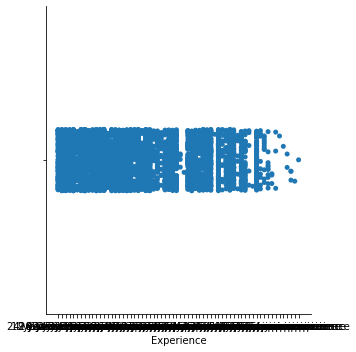

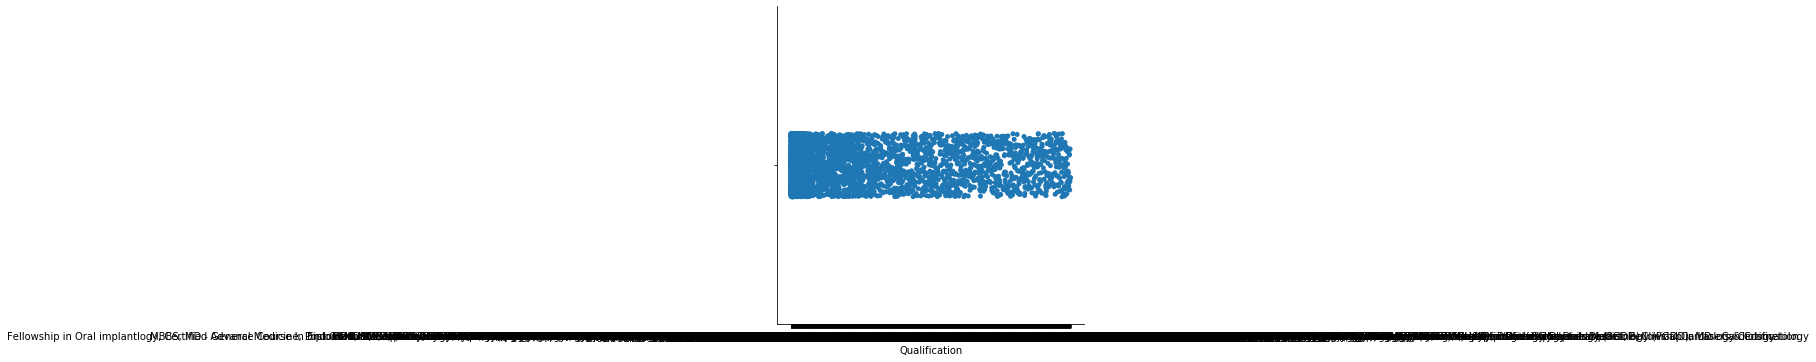

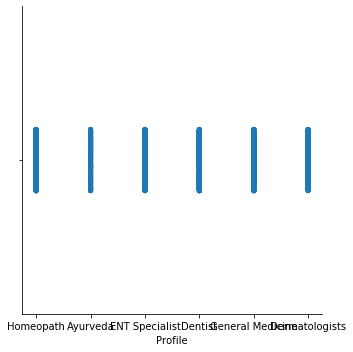


Using LabelEncoder to convert categorical data to number data



 Data Types after using LabelEncoder

 Qualification         int32
Experience            int32
Rating                int32
Place                 int32
Profile               int32
Miscellaneous_Info    int32
Fees                  int64
dtype: object

Violinplot:



 It shows where the more values of the dataset lies



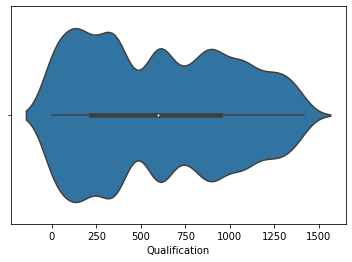

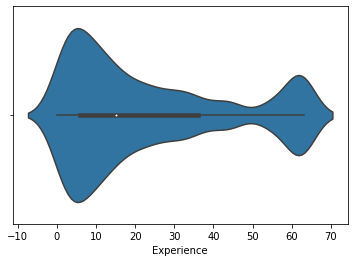

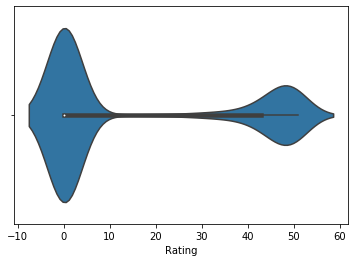

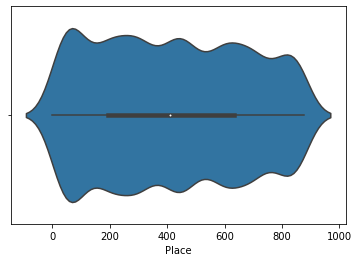

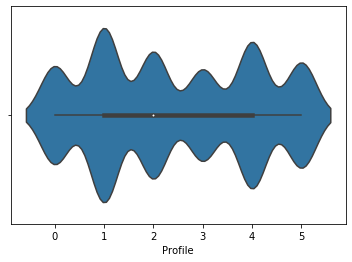


Plotting outliers:




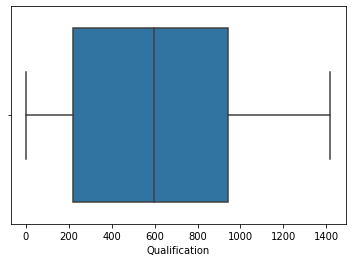

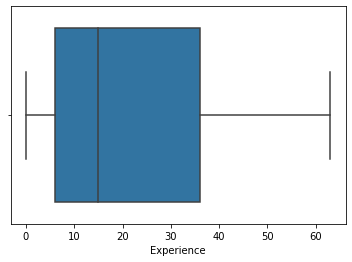

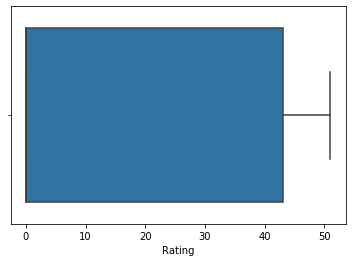

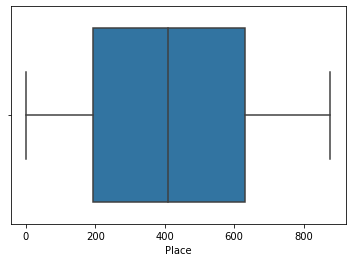

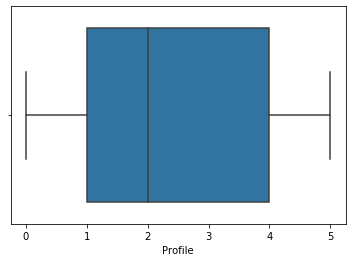

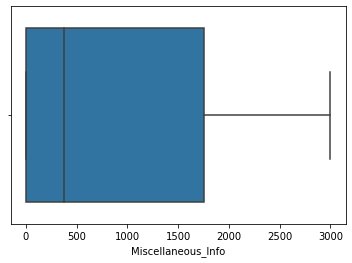


Distribution plot: To check the skewness of data




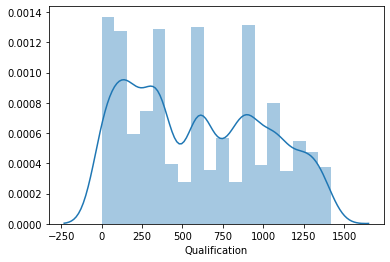

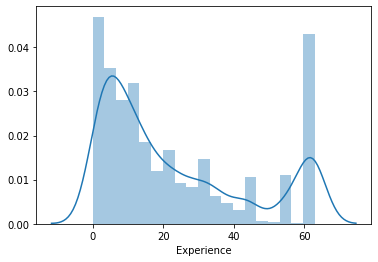

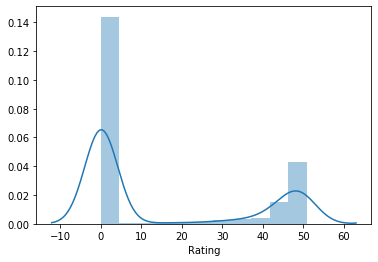

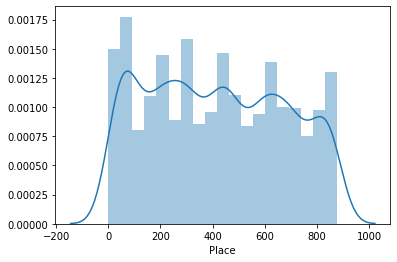

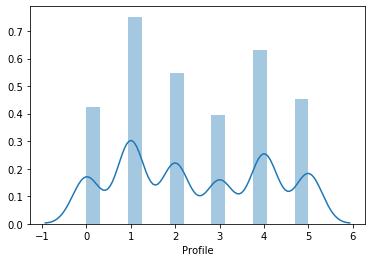

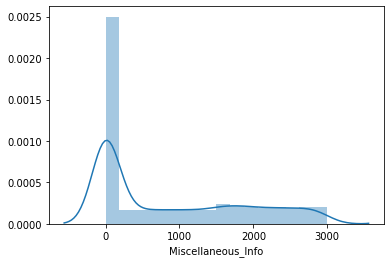


 Distribution plot shows data is not normally distributed



Histograms: It show the frequency distribution of the data




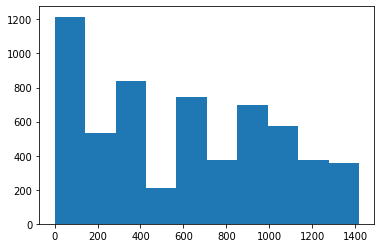

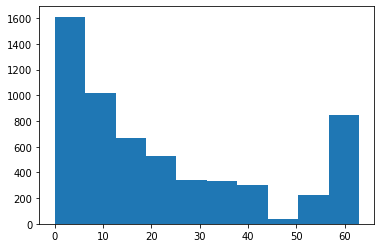

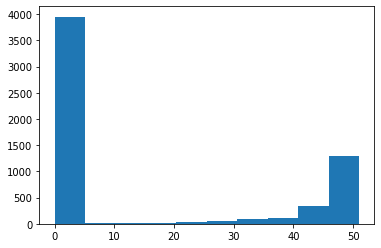

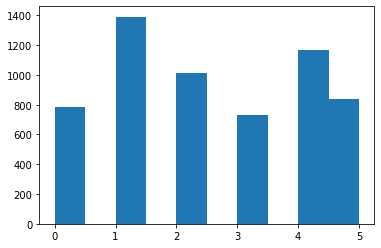

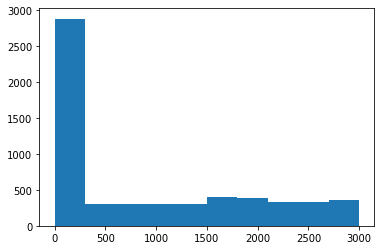


Bivariate Analysis



Lineplot




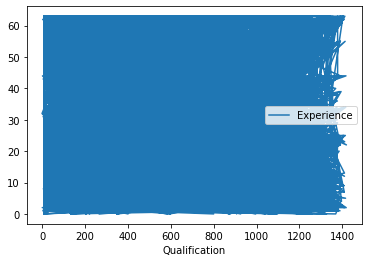

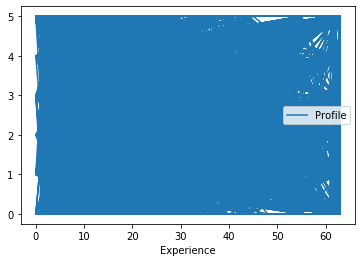

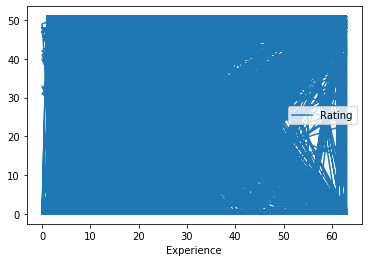


Barplots




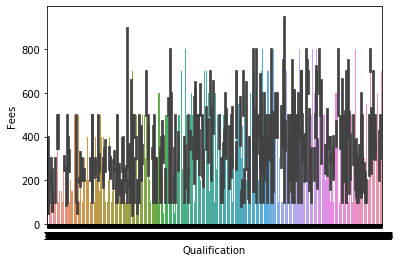

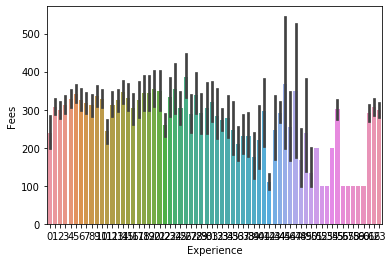

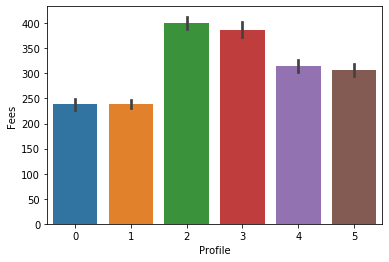

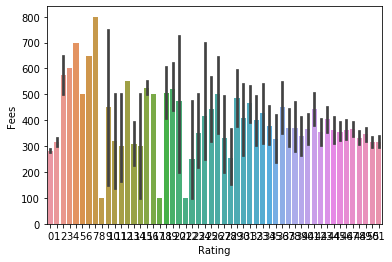

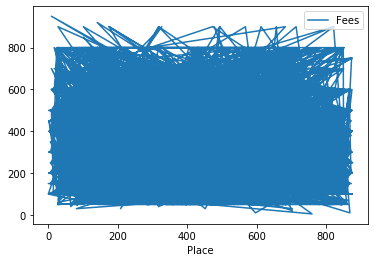

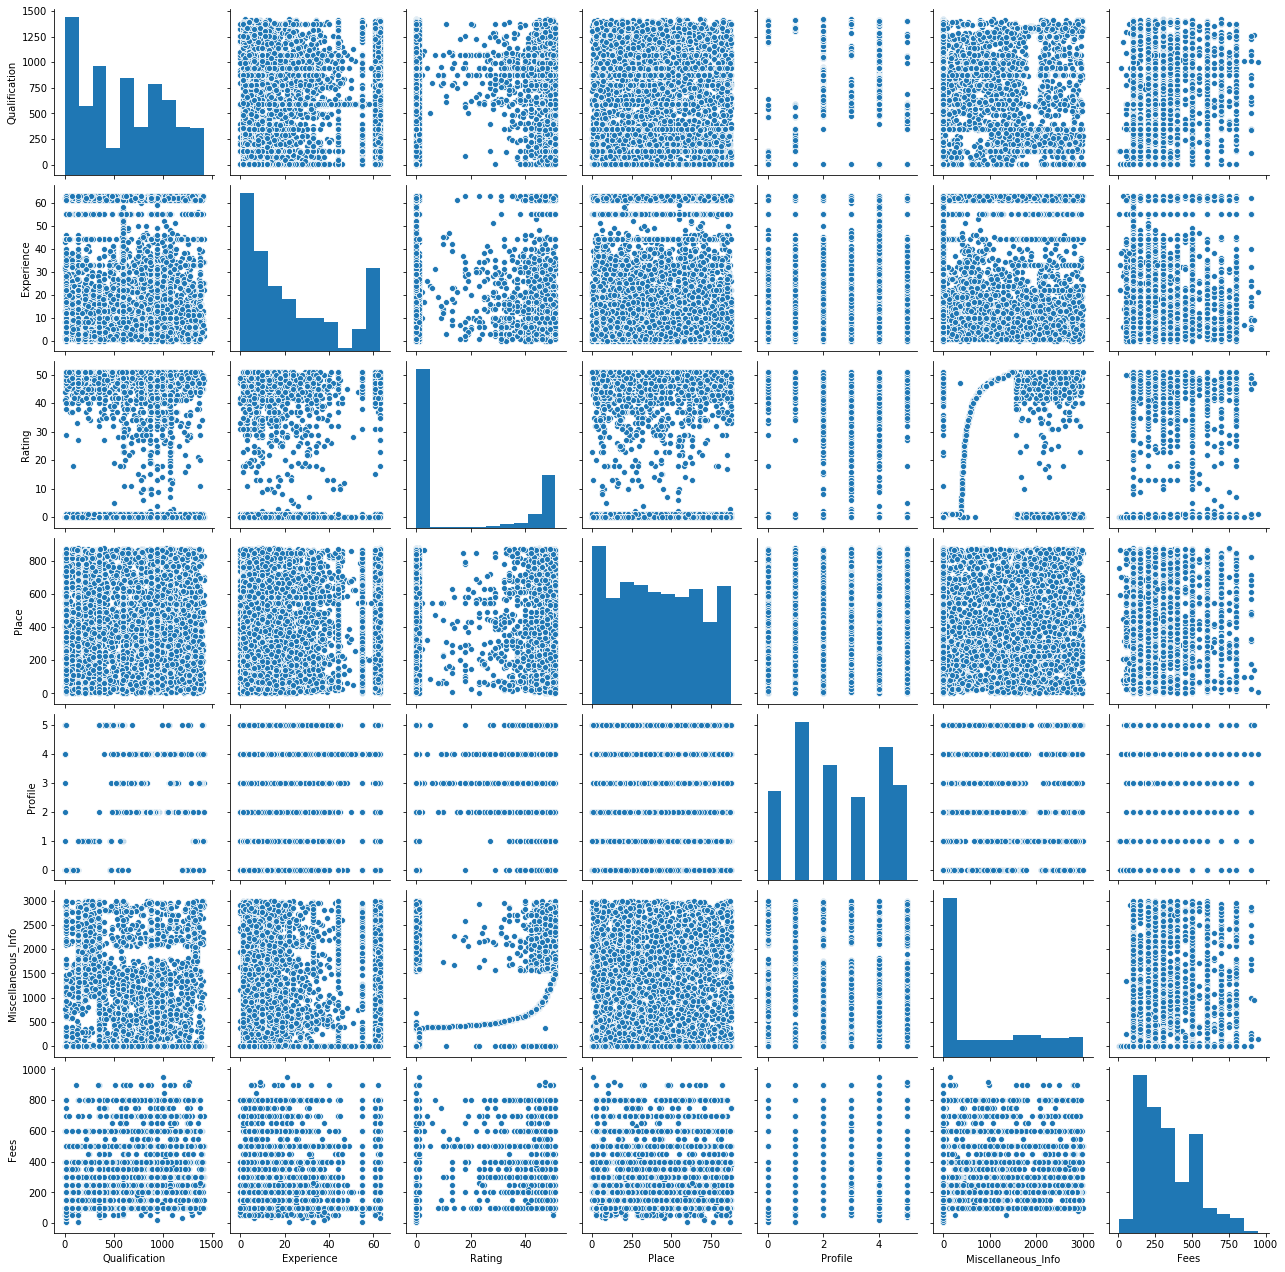


Checking the 'z score' / outliers of the dataset, if present, will remove it


Before removing zscore:  (5921, 7)
After removing zscore:  (5901, 7)

Assigning the input and output data



Y Shape :  (5901,)

StandardScaler is used to scale the data



 X shape :  (5901, 6)

Checking the skewness of data


Qualification         0.238380
Experience            0.821643
Rating                0.803488
Place                 0.119190
Profile               0.107415
Miscellaneous_Info    0.676913
dtype: float64

skew flag :  0

Removing skewness of data



For loop Skew: 
 Qualification         0.238380
Experience            0.821643
Rating                0.803488
Place                 0.119190
Profile               0.107415
Miscellaneous_Info    0.676913
dtype: float64

For loop Skew: 
 Qualification         0.238380
Experience            0.821643
Rating                0.803488
Place                 0.119190
Profile               0.107415
Miscellaneous_Info    0.676913
dtype: float64

 Inside

In [661]:
(x1, y1) = my_func(ds, 'Train')
print ('\nTraining dataset shape: ', x1.shape, y1.shape)


# Doctor Consulation testing dataset

In [662]:
(ds) = read_data(file_x_test)
ds

Filename :  Doctor_Final_Test.xlsx


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...



 Printing head of data:                                       Qualification           Experience  \
0                                             MBBS  35 years experience   
1       MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                       MBBS, DDVL  40 years experience   
3                                             BAMS   0 years experience   
4  BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   

  Rating                        Place           Profile  \
0    NaN       Ghatkopar East, Mumbai  General Medicine   
1    NaN  West Marredpally, Hyderabad    ENT Specialist   
2    70%            KK Nagar, Chennai    Dermatologists   
3    NaN       New Ashok Nagar, Delhi          Ayurveda   
4   100%    Kanakpura Road, Bangalore           Dentist   

                                  Miscellaneous_Info  
0                                                NaN  
1                                                NaN  
2  

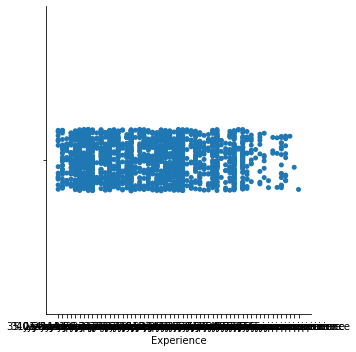

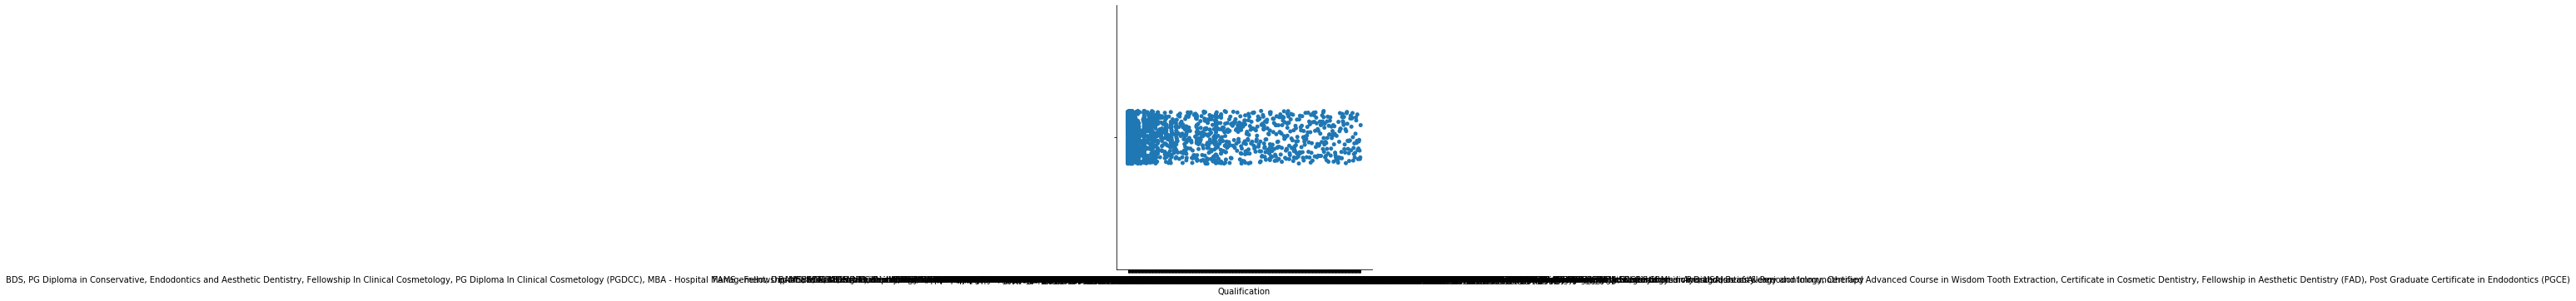

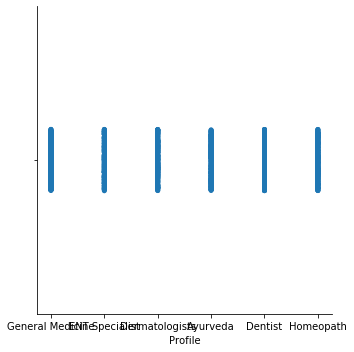


Using LabelEncoder to convert categorical data to number data



 Data Types after using LabelEncoder

 Qualification         int32
Experience            int32
Rating                int32
Place                 int32
Profile               int32
Miscellaneous_Info    int32
dtype: object

Violinplot:



 It shows where the more values of the dataset lies



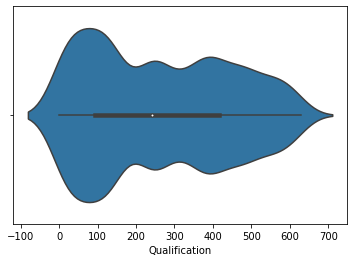

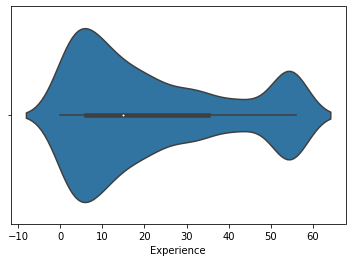

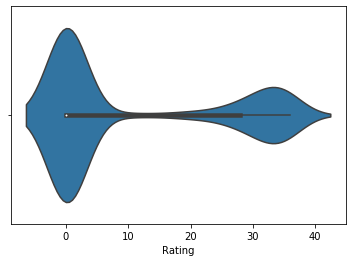

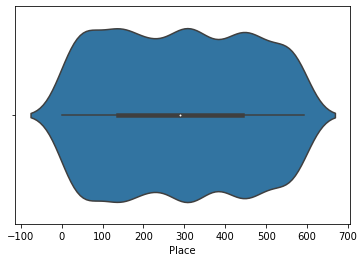

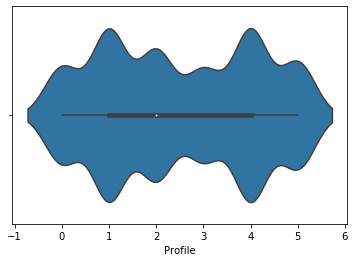


Plotting outliers:




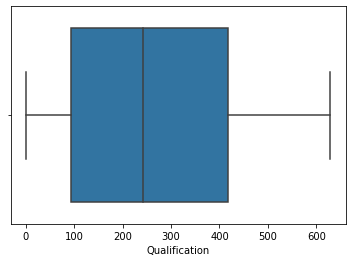

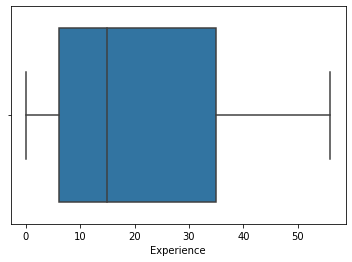

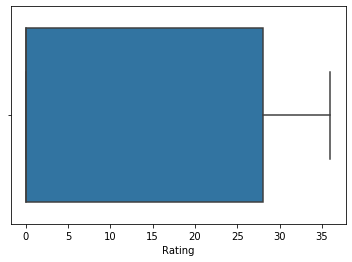

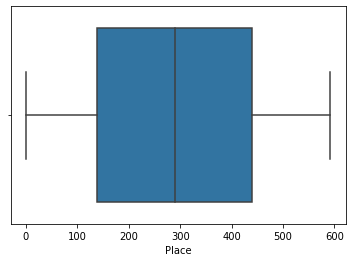

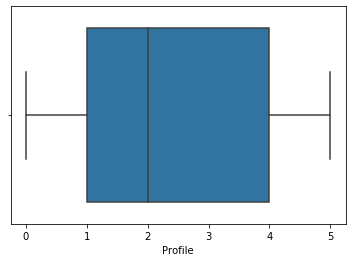

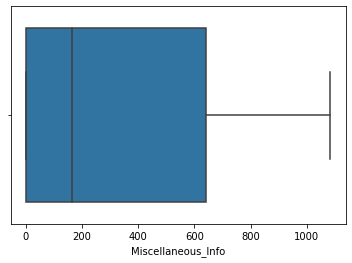


Distribution plot: To check the skewness of data




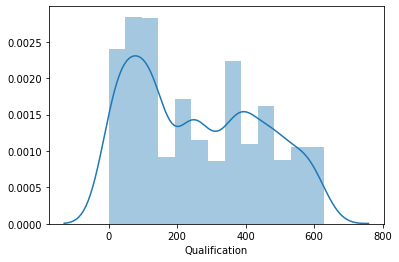

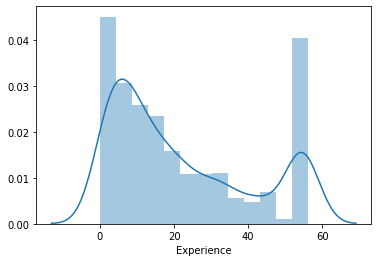

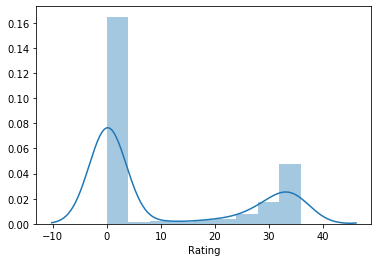

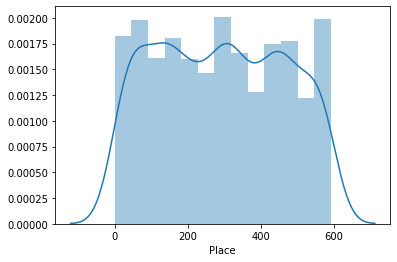

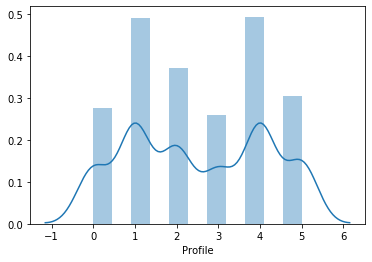

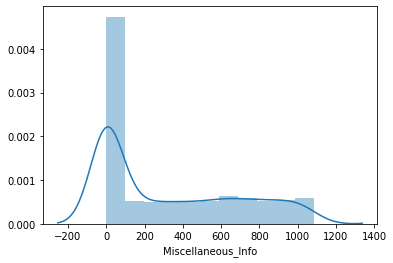


 Distribution plot shows data is not normally distributed



Histograms: It show the frequency distribution of the data




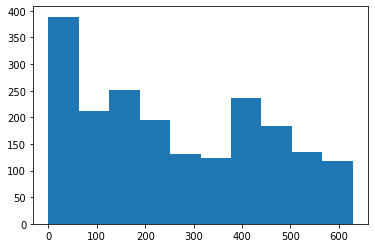

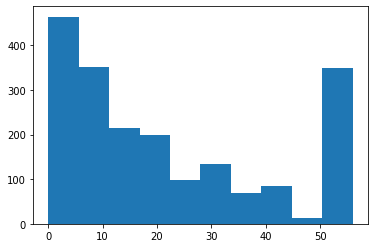

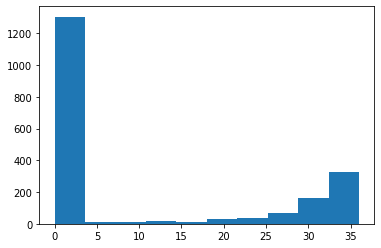

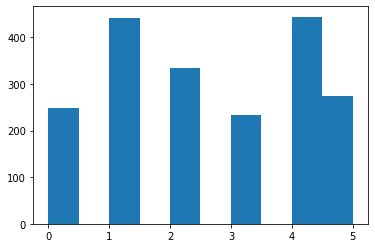

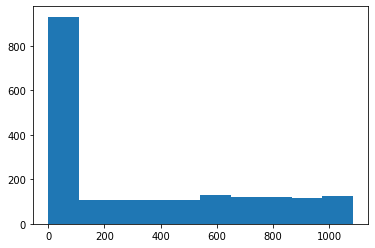


Bivariate Analysis



Lineplot




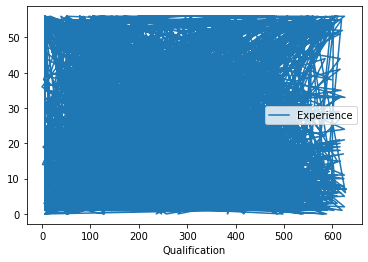

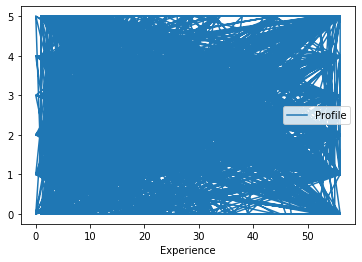

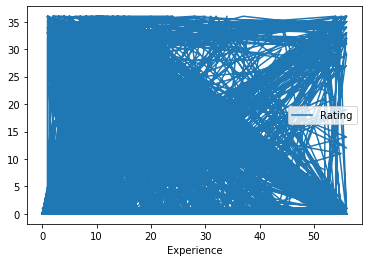

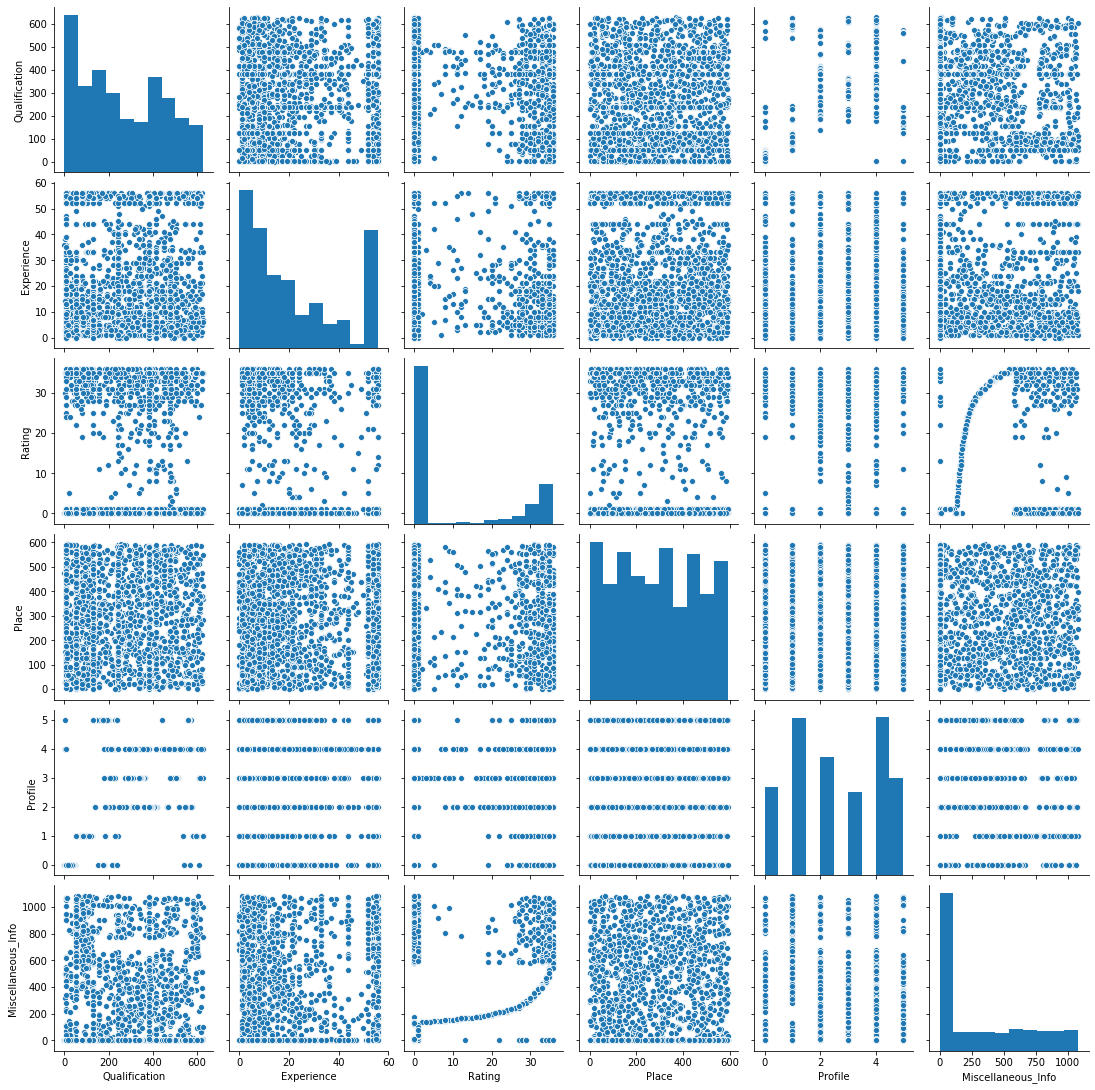


Checking the 'z score' / outliers of the dataset, if present, will remove it


Before removing zscore:  (1976, 6)
After removing zscore:  (1976, 6)

Assigning the input and output data



StandardScaler is used to scale the data



 X shape :  (1976, 6)

Checking the skewness of data


Qualification         0.277198
Experience            0.686940
Rating                0.834355
Place                 0.047744
Profile               0.027881
Miscellaneous_Info    0.652502
dtype: float64

skew flag :  0

Removing skewness of data



For loop Skew: 
 Qualification         0.277198
Experience            0.686940
Rating                0.834355
Place                 0.047744
Profile               0.027881
Miscellaneous_Info    0.652502
dtype: float64

For loop Skew: 
 Qualification         0.277198
Experience            0.686940
Rating                0.834355
Place                 0.047744
Profile               0.027881
Miscellaneous_Info    0.652502
dtype: float64

 Inside remove skew data fu

In [663]:
(x2) = my_func(ds, 'Test')
print ('\n Testing dataset shape: ', x2.shape)

In [664]:
# Subroutine to get the best random state with max r2_score

def max_r2_score (regr, x, y):
    max_r2_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test, y_pred)


        #print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
        if (r2_scr > max_r2_score):
            max_r2_score = r2_scr
            final_r_state = r_state
    print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)
    return final_r_state

In [665]:
# lets use linear regression and check max_r2_score corresponding to different random states

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = max_r2_score(lreg, x1, y1)


Max r2 score corresponding to  50  is:  0.12009529434316091


In [666]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors ={'n_neighbors' : range(1, 42)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x1, y1)
gknr.best_params_

{'n_neighbors': 41}

In [667]:
 # Lets use KNN regression and check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors = 41 )
r_state = max_r2_score(knr, x1, y1)


Max r2 score corresponding to  50  is:  0.17970870619465196


In [668]:
# Lets check the mean r2 score of both linear regression model and knn regression

print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x1, y1, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x1, y1, cv=5, scoring='r2').std())
print ("\n*****************\n")
print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x1, y1, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for linear regression:  0.09452398030548101
Standard deviation for r2 score in linear regression:  0.00447701306925557

*****************

Mean r2 score for KNN regression:  0.13393035192442357
Standard deviation for r2 score in KNN regression:  0.011096206806552896


In [669]:
# Lets check Lasso Regression and find best value of alpha

from sklearn.linear_model import Lasso, Ridge
lsreg = Lasso()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x1, y1)
clf.best_params_

{'alpha': 0.01}

In [670]:
# Lets check max r2 score when we use Lasso

lsreg = Lasso(alpha=0.001)
r_state = max_r2_score (lsreg, x1, y1)


Max r2 score corresponding to  50  is:  0.1200934497448628


In [671]:
# Lets use cross_val_score with Lasso

print ('Mean r2 score for Lasso Regression: ', cross_val_score(lsreg, x1, y1, cv=5, scoring='r2').mean())
print ('Standard deviation in  r2 score for Lasso Regression: ', cross_val_score(lsreg, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for Lasso Regression:  0.09452399429793504
Standard deviation in  r2 score for Lasso Regression:  0.004476296115486152


In [672]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 10, 150, 200, 250, 300]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x1,y1)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [673]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=300)
print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x1, y1, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for Gradient Boosting Regression:  0.19948538236925922
Standard Deviation in  r2 score for Gradient Boosting Regression:  0.03338409124626377


In [674]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(gbr, x1, y1)


Max r2 score corresponding to  86  is:  0.24473942423534312


In [675]:
# Now Lets use AdaBostRegression algorithm 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10,100, 150, 200, 250], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor(), Ridge()]}

clf = GridSearchCV (ada_reg, parameters, cv=5)
clf.fit(x1,y1)
clf.best_params_

{'base_estimator': Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [681]:
ada_reg = AdaBoostRegressor(base_estimator = Lasso(), learning_rate=0.001, n_estimators=10)
print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x1, y1, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for Ada Boosting Regression:  0.09397811556066804
Standard Deviation in  r2 score for Ada Boosting Regression:  0.0039104569095245794


In [682]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x1, y1)


Max r2 score corresponding to  86  is:  0.11675851863594666


In [678]:
# we tried all the models and till now GradientBoost Regression is the best
# random state corresponding to highest r2 score is 86

x_train, x_test, y_train, y_test = train_test_split(x1, y1, random_state=86, test_size = 0.20)
gbr = GradientBoostingRegressor(learning_rate=0.001, n_estimators=10)
gbr.fit(x_train, y_train)
y_pred =  gbr.predict(x2)
print (y_pred)

[134.02125027 260.79224703 194.46873526 ... 434.19806732 433.95527655
 176.29683556]


In [679]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_dconsultation.csv')

In [680]:
from sklearn.externals import joblib
joblib.dump(gbr, 'Project_DConsultation.pkl')
#clf = joblib.load('Project_DConsultation.pkl')
#clf.predict(x2)

['Project_DConsultation.pkl']